# SQL OPERATIONS

In [1]:
import sqlite3
import pandas as pd

# Create a connection to the database
conn = sqlite3.connect('crime_data.db')
cursor = conn.cursor()


3.1	        Insert records from 42_District_wise_crimes_committed_against_women_2001_2012.csv into a table.

In [2]:
# Load the CSV file
file_path_women = 'C:\\Users\\DELL\\Downloads\\India_Crime -Zip\\India_Crime - Copy\\42_District_wise_crimes_committed_against_women_2001_2012.csv'
df_women = pd.read_csv(file_path_women)

# Create the table
df_women.to_sql('crimes_against_women', conn, if_exists='replace', index=False)

print("Data inserted successfully into crimes_against_women table.")


Data inserted successfully into crimes_against_women table.


Inspecting Column Names

In [4]:
# Load the CSV file again to check column names
df_women = pd.read_csv(file_path_women)
print(df_women.columns)


Index(['STATE/UT', 'DISTRICT', 'Year', 'Rape', 'Kidnapping and Abduction',
       'Dowry Deaths', 'Assault on women with intent to outrage her modesty',
       'Insult to modesty of Women', 'Cruelty by Husband or his Relatives',
       'Importation of Girls'],
      dtype='object')


3.2	Write SQL query to find the highest number of rapes & Kidnappings that happened in which state, District, and year.

In [5]:
# Assuming the actual column names are 'STATE_UT', 'DISTRICT', 'YEAR', 'RAPE', 'KIDNAPPING_AND_ABDUCTION'
query_rapes = """
SELECT "STATE/UT" as State_UT, DISTRICT, YEAR, MAX(RAPE) as Max_Rape
FROM crimes_against_women
GROUP BY "STATE/UT", DISTRICT, YEAR
ORDER BY Max_Rape DESC
LIMIT 1
"""
max_rapes = pd.read_sql_query(query_rapes, conn)
print(max_rapes)

query_kidnappings = """
SELECT "STATE/UT" as State_UT, DISTRICT, YEAR, MAX("KIDNAPPING AND ABDUCTION") as Max_Kidnapping
FROM crimes_against_women
GROUP BY "STATE/UT", DISTRICT, YEAR
ORDER BY Max_Kidnapping DESC
LIMIT 1
"""
max_kidnappings = pd.read_sql_query(query_kidnappings, conn)
print(max_kidnappings)


         State_UT DISTRICT  Year  Max_Rape
0  MADHYA PRADESH    TOTAL  2012      3425
        State_UT DISTRICT  Year  Max_Kidnapping
0  UTTAR PRADESH    TOTAL  2012            7910


3.3	Write SQL query to find All the lowest number of rapes & Kidnappings that happened in which state, District, and year.



In [6]:
query_min_rapes = """
SELECT "STATE/UT" as State_UT, DISTRICT, YEAR, MIN(RAPE) as Min_Rape
FROM crimes_against_women
GROUP BY "STATE/UT", DISTRICT, YEAR
ORDER BY Min_Rape ASC
LIMIT 1
"""
min_rapes = pd.read_sql_query(query_min_rapes, conn)
print(min_rapes)

query_min_kidnappings = """
SELECT "STATE/UT" as State_UT, DISTRICT, YEAR, MIN("KIDNAPPING AND ABDUCTION") as Min_Kidnapping
FROM crimes_against_women
GROUP BY "STATE/UT", DISTRICT, YEAR
ORDER BY Min_Kidnapping ASC
LIMIT 1
"""
min_kidnappings = pd.read_sql_query(query_min_kidnappings, conn)
print(min_kidnappings)


        State_UT DISTRICT  Year  Min_Rape
0  A & N ISLANDS      CAR  2012         0
        State_UT DISTRICT  Year  Min_Kidnapping
0  A & N ISLANDS  NICOBAR  2001               0



3.4	Insert records from 02_District_wise_crimes_committed_against_ST_2001_2012.csv into a new table



In [7]:
file_path_st = 'C:\\Users\\DELL\\Downloads\\India_Crime -Zip\\India_Crime - Copy\\02_District_wise_crimes_committed_against_ST_2001_2012.csv'
df_st = pd.read_csv(file_path_st)

# Inspect column names
print(df_st.columns)

# Create the table
df_st.to_sql('crimes_against_st', conn, if_exists='replace', index=False)

print("Data inserted successfully into crimes_against_st table.")


Index(['STATE/UT', 'DISTRICT', 'Year', 'Murder', 'Rape',
       'Kidnapping Abduction', 'Dacoity', 'Robbery', 'Arson', 'Hurt',
       'Protection of Civil Rights (PCR) Act',
       'Prevention of atrocities (POA) Act', 'Other Crimes Against STs'],
      dtype='object')
Data inserted successfully into crimes_against_st table.


3.5	Write SQL query to find the highest number of dacoity/robbery in which district.

In [8]:
query_dacoity = """
SELECT DISTRICT, MAX(DACOITY) as Max_Dacoity
FROM crimes_against_st
GROUP BY DISTRICT
ORDER BY Max_Dacoity DESC
LIMIT 1
"""
max_dacoity = pd.read_sql_query(query_dacoity, conn)
print(max_dacoity)


  DISTRICT  Max_Dacoity
0    TOTAL           29


3.6	Write SQL query to find in which districts(All) the lowest number of murders happened.

In [9]:
query_min_murders = """
SELECT DISTRICT, MIN(MURDER) as Min_Murder
FROM crimes_against_st
GROUP BY DISTRICT
ORDER BY Min_Murder ASC
"""
min_murders = pd.read_sql_query(query_min_murders, conn)
print(min_murders)


              DISTRICT  Min_Murder
0    24 PARGANAS NORTH           0
1    24 PARGANAS SOUTH           0
2      A and N ISLANDS           0
3             ADILABAD           0
4                 AGRA           0
..                 ...         ...
808        YAMUNANAGAR           0
809           YAVATMAL           0
810          ZUNHEBOTO           0
811          KONDAGAON           1
812            MUNGELI           1

[813 rows x 2 columns]


3.7	Write SQL query to find the number of murders in ascending order in district and year wise.

In [10]:
query_asc_murders = """
SELECT DISTRICT, YEAR, MURDER
FROM crimes_against_st
ORDER BY MURDER ASC
"""
asc_murders = pd.read_sql_query(query_asc_murders, conn)
print(asc_murders)


           DISTRICT  Year  Murder
0          ADILABAD  2001       0
1         ANANTAPUR  2001       0
2          CHITTOOR  2001       0
3          CUDDAPAH  2001       0
4     EAST GODAVARI  2001       0
...             ...   ...     ...
9013          TOTAL  2010      47
9014          TOTAL  2005      48
9015          TOTAL  2002      49
9016          TOTAL  2011      49
9017          TOTAL  2012      62

[9018 rows x 3 columns]


3.8.1	Insert records of STATE/UT, DISTRICT, YEAR, MURDER, ATTEMPT TO MURDER, and RAPE columns only from 01_District_wise_crimes_committed_IPC_2001_2012.csv into a new table.

In [11]:
file_path_ipc = 'C:\\Users\\DELL\\Downloads\\India_Crime -Zip\\India_Crime - Copy\\01_District_wise_crimes_committed_IPC_2001_2012.csv'
df_ipc = pd.read_csv(file_path_ipc)

# Select specific columns
df_ipc_selected = df_ipc[['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER', 'RAPE']]

# Create the table
df_ipc_selected.to_sql('crimes_ipc', conn, if_exists='replace', index=False)

print("Data inserted successfully into crimes_ipc table.")


Data inserted successfully into crimes_ipc table.


3.8.2	Write SQL query to find which District in each state/UT has the highest number of murders year wise. Your output should show STATE/UT, YEAR, DISTRICT, and MURDERS.



In [12]:
query_highest_murders = """
SELECT "STATE/UT" as State_UT, YEAR, DISTRICT, MAX(MURDER) as Max_Murder
FROM crimes_ipc
GROUP BY "STATE/UT", YEAR, DISTRICT
ORDER BY "STATE/UT", YEAR, Max_Murder DESC
"""
highest_murders = pd.read_sql_query(query_highest_murders, conn)
print(highest_murders)


           State_UT  YEAR          DISTRICT  Max_Murder
0     A & N ISLANDS  2001             TOTAL          13
1     A & N ISLANDS  2001           ANDAMAN          13
2     A & N ISLANDS  2001           NICOBAR           0
3     A & N ISLANDS  2002             TOTAL          17
4     A & N ISLANDS  2002           ANDAMAN          14
...             ...   ...               ...         ...
9011    WEST BENGAL  2012    SEALDAH G.R.P.          19
9012    WEST BENGAL  2012     HOWRAH G.R.P.          16
9013    WEST BENGAL  2012            BDN CP          15
9014    WEST BENGAL  2012  KHARAGPUR G.R.P.           6
9015    WEST BENGAL  2012   SILIGURI G.R.P.           4

[9016 rows x 4 columns]


3.8.3	Store the above data (the result of 3.2) in DataFrame and analyze districts that appear 3 or more than 3 years and print the corresponding state/UT, district, murders, and year in descending order.

In [13]:
query_frequent_districts = """
WITH District_Counts AS (
    SELECT "STATE/UT" as State_UT, DISTRICT, COUNT(DISTRICT) as District_Count
    FROM crimes_ipc
    GROUP BY "STATE/UT", DISTRICT
)
SELECT State_UT, DISTRICT, District_Count
FROM District_Counts
WHERE District_Count >= 3
ORDER BY District_Count DESC
"""
frequent_districts = pd.read_sql_query(query_frequent_districts, conn)
print(frequent_districts)


           State_UT         DISTRICT  District_Count
0     A & N ISLANDS            TOTAL              12
1    ANDHRA PRADESH         ADILABAD              12
2    ANDHRA PRADESH        ANANTAPUR              12
3    ANDHRA PRADESH         CHITTOOR              12
4    ANDHRA PRADESH         CUDDAPAH              12
..              ...              ...             ...
796          PUNJAB     CP JALANDHAR               3
797          PUNJAB      CP LUDHIANA               3
798      TAMIL NADU  CHENNAISUBURBAN               3
799   UTTAR PRADESH        CSM NAGAR               3
800   UTTAR PRADESH    RAMABAI NAGAR               3

[801 rows x 3 columns]


3.8.4	Use appropriate graphs to show your data (the result of 3.8.3).



In [9]:
import sqlite3
import pandas as pd

# Establishing the connection to the SQLite database
conn = sqlite3.connect(':memory:')  # Or use the appropriate database file


In [11]:
# Load the CSV files into Pandas dataframes
df_crimes_ipc = pd.read_csv('C:\\Users\\DELL\\Downloads\\India_Crime -Zip\\India_Crime - Copy\\01_District_wise_crimes_committed_IPC_2001_2012.csv')
df_crimes_ipc.to_sql('crimes_ipc', conn, if_exists='replace', index=False)

df_crimes_women = pd.read_csv('C:\\Users\\DELL\\Downloads\\India_Crime -Zip\\India_Crime - Copy\\42_District_wise_crimes_committed_against_women_2001_2012.csv')
df_crimes_women.to_sql('crimes_against_women', conn, if_exists='replace', index=False)


9017

In [12]:
query_frequent_districts = """
WITH District_Counts AS (
    SELECT "STATE/UT" as State_UT, DISTRICT, COUNT(DISTRICT) as District_Count
    FROM crimes_ipc
    GROUP BY "STATE/UT", DISTRICT
)
SELECT State_UT, DISTRICT, District_Count
FROM District_Counts
WHERE District_Count >= 3
ORDER BY District_Count DESC
"""
frequent_districts = pd.read_sql_query(query_frequent_districts, conn)
print(frequent_districts.head())
print(frequent_districts.shape)


         State_UT   DISTRICT  District_Count
0   A & N ISLANDS      TOTAL              12
1  ANDHRA PRADESH   ADILABAD              12
2  ANDHRA PRADESH  ANANTAPUR              12
3  ANDHRA PRADESH   CHITTOOR              12
4  ANDHRA PRADESH   CUDDAPAH              12
(801, 3)


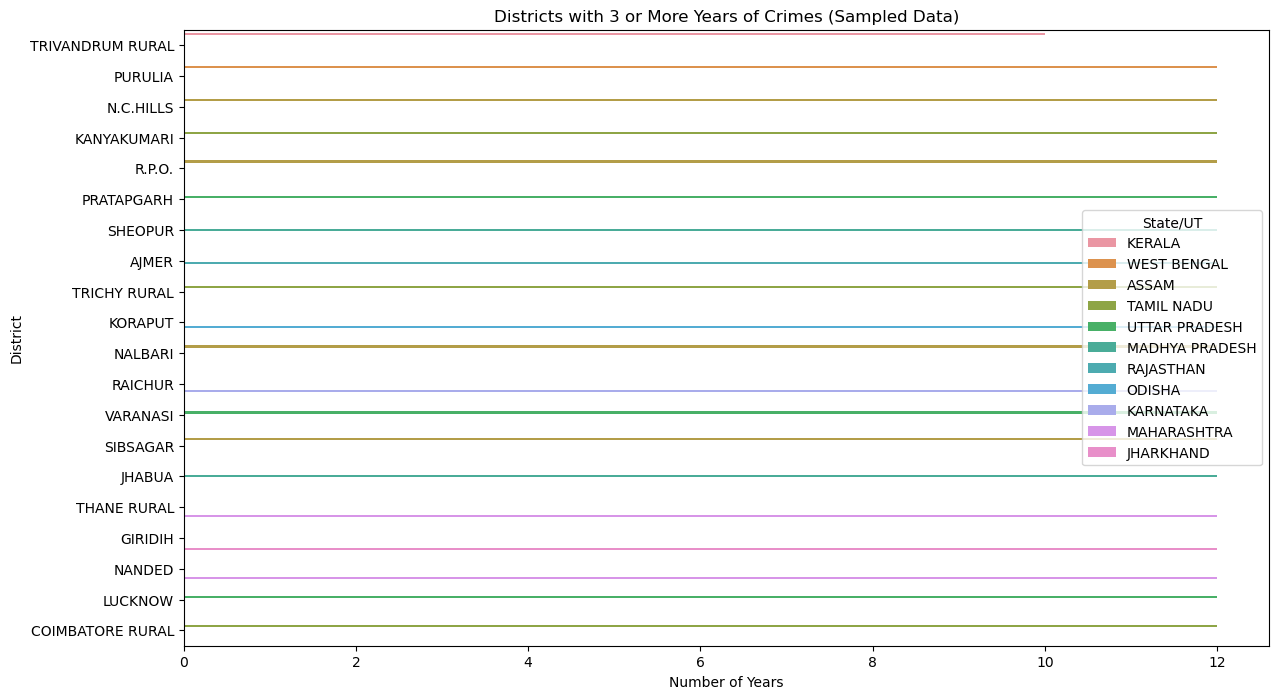

In [13]:
# Sampling a smaller subset of data for plotting
sampled_data = frequent_districts.sample(n=20, random_state=42)

plt.figure(figsize=(14, 8))
sns.barplot(data=sampled_data, x='District_Count', y='DISTRICT', hue='State_UT')
plt.title('Districts with 3 or More Years of Crimes (Sampled Data)')
plt.xlabel('Number of Years')
plt.ylabel('District')
plt.legend(title='State/UT')
plt.show()


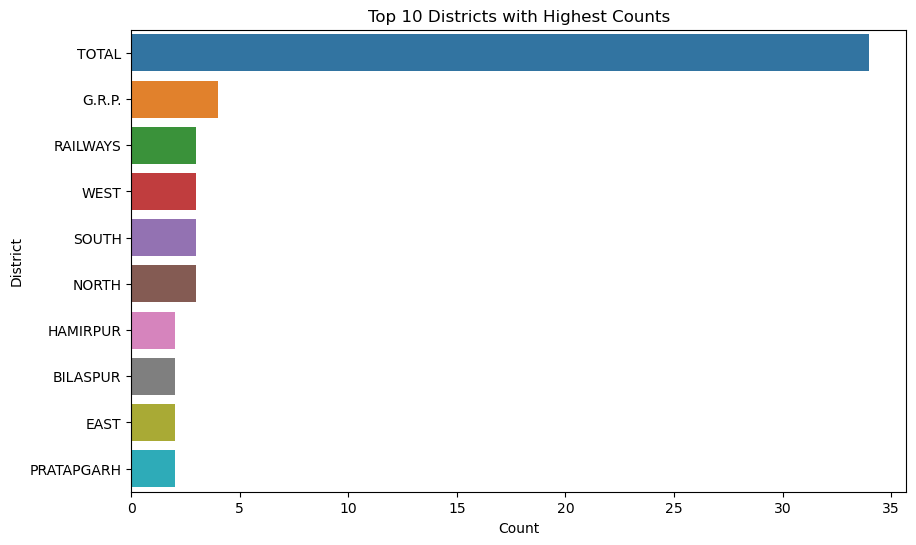

In [14]:
# Simple plot to test if plotting works
plt.figure(figsize=(10, 6))
sns.countplot(data=frequent_districts, y='DISTRICT', order=frequent_districts['DISTRICT'].value_counts().index[:10])
plt.title('Top 10 Districts with Highest Counts')
plt.xlabel('Count')
plt.ylabel('District')
plt.show()
